In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
from datetime import datetime 
import numpy as np
import os, random, math, time
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
def read_file(filename):
    df = pd.read_csv(f'{filename}', encoding="utf-8") #"cp949"
    if sum(df.duplicated(df.columns)) != 0:
        print(f"...There are {sum(df.duplicated(df.columns))} duplicates\n...Remove them")
        df = df.drop_duplicates()
    else:
        print("...There are no duplicates")
    df.name = filename
    print(f"shape: {df.shape}")
    return df

def read_file2(filename):
    df = pd.read_excel(f'{filename}', header=None)
    if sum(df.duplicated(df.columns)) != 0:
        print(f"...There are {sum(df.duplicated(df.columns))} duplicates\n...Remove them")
        df = df.drop_duplicates()
    else:
        print("...There are no duplicates")
    df.name = filename
    print(f"shape: {df.shape}")
    return df

def check_NA(df):
    print(f"NA check")
    NA_res = df.isna().sum()
    if NA_res.sum() != 0:
        for idx, i in enumerate(NA_res):
            if i != 0:
                print(df.columns[idx],i,"->",round(i/df.shape[0]*100,3),"%")
    else:
        print("...There's no NA")

In [3]:
filepath = "./data"

In [4]:
survey = read_file2(os.path.join(filepath,'설문데이터.xlsx'))

...There are no duplicates
shape: (603, 138)


In [5]:
df = deepcopy(survey)
print(df.shape)
df_info = df.iloc[0]
df.columns = df.iloc[1]
df = df.drop(index = [0, 1])
df = df.reset_index(drop=True)
df.head(3)

(603, 138)


1,id,id_guro,GP,sub_gp,SERIAL,born,age,sex,type1,type2,type3,pa1,pa2,pa3,pa4,pa5,pa6,pa7,pa8,pa9,...,j1,j2,j3,j4,reli,time1,time2,time3,time4,time5,dq7_1,dq7_2,dq7_3,dq7_4,dq7_5,dq7_6,dq7_7,DISE1,DISE2,DISE3
0,NaN,"125,321.0000",광양,NaN,02N190200348,"1,935.0000",85.0000,여,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,보통,그렇지 않다,그렇다,보통,3.0000,06:00:00,08:00:00,12:00:00,18:00:00,22:00:00,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"125,359.0000",광양,NaN,02N190200262,"1,941.0000",79.0000,여,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,그렇다,그렇다,그렇다,그렇다,3.0000,05:00:00,07:00:00,12:00:00,18:00:00,21:00:00,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN
2,NaN,209.0000,구로,구로어르신돌봄통합센터,NaN,"1,949.0000",70.0000,여,기초생활수급,독거,노인돌봄기본서비스,예,아니오,아니오,아니오,아니오,아니오,아니오,예,예,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN


# id와 id guro 둘다 특정 안되는 경우는 drop

In [6]:
set(df.id.unique())&set(df.id_guro.unique())

set()

- 겹치는 아이디는 없고

In [7]:
print(df.shape, df.id.nunique())

(601, 138) 179


In [8]:
df.loc[df.id =='126758, 126401', "id"]= "126758"
df = df.append(df.loc[190], ignore_index=True)
df.iloc[601, 0]= "126401"

In [9]:
df["id"]= df["id"].fillna(0)
df["id_guro"]= df["id_guro"].fillna(0)

df["id"]= df.id.astype("float")
df["id_guro"]= df.id_guro.astype("float")
df["id"]= df.id.apply(round)
df["id_guro"]= df.id_guro.apply(round)

df["id"]= df.id.astype("str")
df["id_guro"]= df.id_guro.astype("str")

In [10]:
def filter_na(x): 
    if len(x)<6: return "제거"
    else: return x

In [11]:
df["id"] = df['id'].apply(filter_na)
df["id_guro"] = df['id_guro'].apply(filter_na)
df = df[(df.id!="제거")|(df.id_guro!="제거")].reset_index(drop=True)

In [12]:
df[(df.id!="제거")&(df.id_guro!="제거")]

1,id,id_guro,GP,sub_gp,SERIAL,born,age,sex,type1,type2,type3,pa1,pa2,pa3,pa4,pa5,pa6,pa7,pa8,pa9,...,j1,j2,j3,j4,reli,time1,time2,time3,time4,time5,dq7_1,dq7_2,dq7_3,dq7_4,dq7_5,dq7_6,dq7_7,DISE1,DISE2,DISE3


In [13]:
df["id"]= df.id+"."+df.id_guro

In [14]:
def filter_na2(x): 
    a = x.split(".")[0]
    b = x.split(".")[1]
    if len(a)<len(b): return b
    else: return a

In [15]:
df["id"] = df['id'].apply(filter_na2)
df = df.drop(["id_guro"], axis=1)

In [16]:
print(df.id.nunique(), df.shape)

459 (459, 137)


In [17]:
df = df.rename(columns = {"id": "doll_id"})

In [18]:
df.head(3)

1,doll_id,GP,sub_gp,SERIAL,born,age,sex,type1,type2,type3,pa1,pa2,pa3,pa4,pa5,pa6,pa7,pa8,pa9,pa10,...,j1,j2,j3,j4,reli,time1,time2,time3,time4,time5,dq7_1,dq7_2,dq7_3,dq7_4,dq7_5,dq7_6,dq7_7,DISE1,DISE2,DISE3
0,125321,광양,NaN,02N190200348,"1,935.0000",85.0000,여,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,보통,그렇지 않다,그렇다,보통,3.0000,06:00:00,08:00:00,12:00:00,18:00:00,22:00:00,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125359,광양,NaN,02N190200262,"1,941.0000",79.0000,여,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,그렇다,그렇다,그렇다,그렇다,3.0000,05:00:00,07:00:00,12:00:00,18:00:00,21:00:00,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN
2,126917,구로,구로어르신돌봄통합센터,NaN,"1,936.0000",83.0000,여,차상위,독거,노인돌봄기본서비스,예,예,아니오,아니오,아니오,아니오,아니오,아니오,예,아니오,...,그렇다,그렇다,그렇다,그렇다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN


In [19]:
# pd.options.display.max_rows = 100

# column 종류 나누고 변수 유형에 맞게 변환

In [20]:
pd.set_option('display.max_rows', None)

In [21]:
df_info = pd.DataFrame(df_info)
df_info = df_info[1:]
df_info["col"]= df.columns
df_info.columns = ["info", "col"]

In [22]:
df_info[:10]

,info,col
1,NaN,doll_id
2,기관,GP
3,기관2,sub_gp
4,제품시리얼,SERIAL
5,생년,born
6,연령(조사시점 연령),age
7,성별,sex
8,수급여부,type1
9,세대구성,type2
10,제공받는 서비스,type3


In [23]:
df.SERIAL.nunique()

254

In [24]:
len(df[df.SERIAL.isna()])

205

<AxesSubplot:xlabel='SERIAL', ylabel='count'>

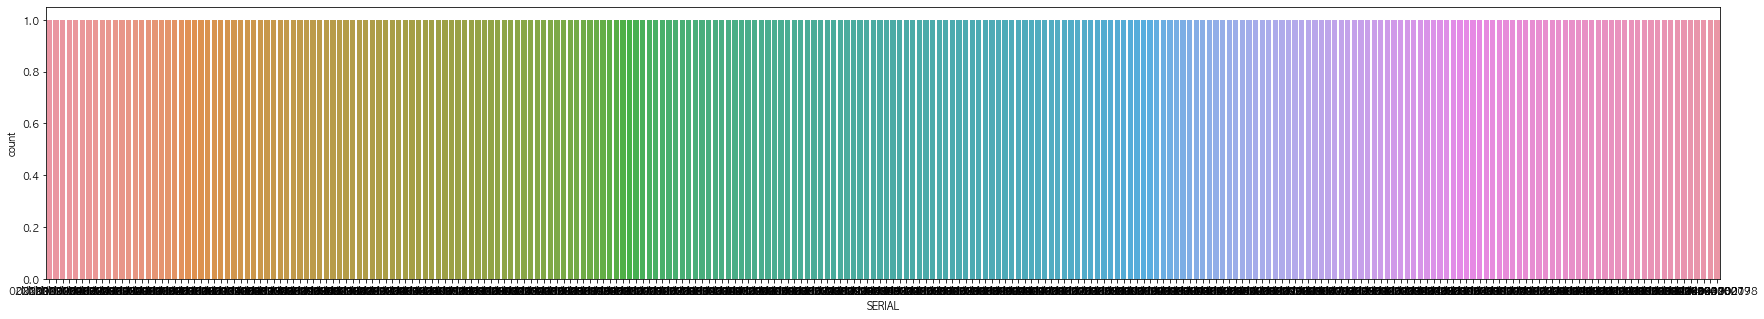

In [25]:
fig,ax = plt.subplots(1,1,figsize=(30,5))
sns.countplot(df.SERIAL)

## 아 제품 시리얼 번호 못쓰는군 ㅠㅠ

In [26]:
# 기본 정보 - id, serial 제외
col_info = ['GP', 'sub_gp', 'born', 'age', 'sex', 'reli', 'type1', 'type2','type3', 
            'house', 'dq1', 'dq2', 'dq3', 'dq3_m', 'dq3_f', 'dq4', 'dq5', 'dq6']

# 기본 정보
col_pa = ['pa1', 'pa2', 'pa3', 'pa4', 'pa5', 'pa6', 'pa7', 'pa8', 'pa9','pa10']

# 복용 약과 복용 시간
col_med =  ['dq8_1', 'dq8_2', 'dq8_3', 'dq8_4', 'dq8_5', 'dq8_6', 'dq8_7'] # 복용약
col_med_t = ['dq7_1', 'dq7_2','dq7_3', 'dq7_4', 'dq7_5', 'dq7_6', 'dq7_7'] # 복용 시간 - 복용약 별로 시간이 있는 것은 아님
col_dis = ['DISE1', 'DISE2', 'DISE3'] # all nan

# 우울증 설문: 인형 사용 전후
col_psy_before = ['sgd1_P', 'sgd2', 'sgd3', 'sgd4', 'sgd5_P', 'sgd6', 'sgd7_P', 'sgd8',
                  'sgd9', 'sgd10', 'sgd11_P', 'sgd12', 'sgd13_P', 'sgd14', 'sgd15'] 
col_psy_after = ['P_sgd1_P','P_sgd2', 'P_sgd3', 'P_sgd4', 'P_sgd5_P', 'P_sgd6', 'P_sgd7_P',
                 'P_sgd8', 'P_sgd9', 'P_sgd10', 'P_sgd11_P', 'P_sgd12', 'P_sgd13_P','P_sgd14', 'P_sgd15']

# 시니어 생활관리 : 인형 사용 전후
col_life1_before = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11','A12'] # 점수가 낮으면 좋음
col_life1_after = ['p_a1', 'p_a2', 'p_a3', 'p_a4', 'p_a5', 'p_a6','p_a7', 'p_a8', 'p_a9', 'p_a10', 'p_a11', 'p_a12']

col_life2_before = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8'] #항목에 따라 3점 척도, 점수가 높으면 좋음
col_life2_after = ['p_d1', 'p_d2','p_d3', 'p_d4', 'p_d5', 'p_d6', 'P_D7', 'P_D8']

# 인형 사용 만족도 관련
col_doll = ['h1', 'i1', 'i2', 'i3','i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'j1', 'j2', 'j3', 'j4']

# 인형 사용 시간
col_time = ['time1', 'time2', 'time3', 'time4', 'time5']

## col_dis = ['DISE1', 'DISE2', 'DISE3'] all nan이므로 drop

In [27]:
df = df.drop(columns = col_dis)

## 인형사용시간: 시간대만 남기고 컬럼명 변경

In [28]:
def convert_time(x): 
    a = x.split(":")[0]
    b = x.split(":")[1]
    if int(a)>24: return 100 # 시간대가 24보다 크면 말이 안되니까 나중에 na 처리
    elif int(b)>=30 : # 30분 기준으로 가까운 시간대로 설정해줌
        if int(a)==23: return(0) # 24시 대신 0시 
        else: return int(a)+1 # 아닐 경우 +1 한 시간대
    else: return int(a) # 30보다 작으면 원래 시간대

In [29]:
for i in range(1,6):
    df["time{}".format(i)] = df["time{}".format(i)].fillna("100:100")
    df["time{}".format(i)] = df["time{}".format(i)].astype("str")
    df["time{}".format(i)] = df['time{}'.format(i)].apply(convert_time)

In [30]:
for i in range(1,6):
    df["time{}".format(i)] = df["time{}".format(i)].astype("int")
    
for i in range(1,6):
    df.loc[df["time{}".format(i)]==100,"time{}".format(i)] = np.nan

In [31]:
df = df.rename(columns = {"time1": "기상", 
                          "time2": "아침", 
                          "time3": "점심", 
                          "time4": "저녁", 
                          "time5": "취침"})

# 출생년도, 나이

In [32]:
df["born"] = df.born.astype("int")
df["age"] = df.age.astype("int")

In [33]:
df.born.unique()

array([1935, 1941, 1936, 1939, 1944, 1940, 1942, 1934, 1950, 1945, 1931,
       1948, 1929, 1937, 1953, 1933, 1946, 1947, 1938, 1949, 1954, 1932,
       1943, 1927, 1951, 1930, 1928, 1952, 1926])

In [34]:
df.age.unique()

array([85, 79, 83, 81, 75, 80, 77, 86, 70, 89, 76, 78, 84, 72, 90, 82, 66,
       71, 73, 87, 74, 93, 69, 88, 68, 65, 91, 67, 92])

## 자녀수 전처리 & 왕래여부 column 추가

In [35]:
print(df.dq3.unique()) # 자녀 수
print(df.dq3_m.unique()) # 아들 수
print(df.dq3_f.unique()) # 딸 수

[nan 2.0 '무자녀' 1.0 3.0 6.0 4.0 '왕래없음' 5.0]
[nan 1.0 2.0 3.0 4.0 5.0]
[nan 1.0 2.0 3.0 5.0 4.0]


In [36]:
df["왕래여부"] = df["dq3"]
df.loc[df["왕래여부"]!="왕래없음", "왕래여부"]=1
df.loc[df["왕래여부"]=="왕래없음", "왕래여부"]=0

In [37]:
len(df[df.왕래여부==1]) # 아직 세상은 살만하다는 것을 알 수 있다. 

453

In [38]:
df["왕래여부"] = df.왕래여부.astype("int")

In [39]:
df["dq3"] = df["dq3"].replace("무자녀", 0)

df.loc[df['dq3']=="왕래없음", "dq3"] = df.dq3_m+df.dq3_f

df["dq3"] = df.dq3.fillna(100)
df["dq3_m"] = df.dq3_m.fillna(100)
df["dq3_f"] = df.dq3_f.fillna(100)

df["dq3"] = df.dq3.astype("int")
df["dq3_m"] = df.dq3_m.astype("int")
df["dq3_f"] = df.dq3_f.astype("int")

df.loc[df["dq3"]==100,"dq3"] = np.nan
df.loc[df["dq3_m"]==100,"dq3_m"] = np.nan
df.loc[df["dq3_f"]==100,"dq3_f"] = np.nan

In [40]:
df = df.rename(columns = {"dq3": "자녀수", 
                          "dq3_m": "아들수", 
                          "dq3_f": "딸수"})

## 기관, 기관2, 수급여부1, 수급여부2, 청결, 식사: 그대로 놔두고 이름만 변경
## 성별: 놔둠

In [41]:
col_info = ['GP','sub_gp','sex', 'reli','type1','type2','type3',
            'house', 'dq1','dq2','dq4','dq5','dq6']

In [42]:
for i in col_info:
    a_ = df_info[df_info.col==i]["info"].values[0]
    print("{}_{} :".format(a_, i), df[i].unique())

기관_GP : ['광양' '구로']
기관2_sub_gp : [nan '구로어르신돌봄통합센터' '온수어르신복지관' '화원종합사회복지관' '동주민센터' '궁동종합사회복지관' '구로노인복지관'
 '구로건강복지센터']
성별_sex : ['여' '남']
종교_reli : [3.0 nan 1.0 2.0 4.0]
수급여부_type1 : [nan '차상위' '기초생활수급']
세대구성_type2 : [nan '독거' '노인부부' '경제적 능력이 없는 가구']
제공받는 서비스_type3 : [nan '노인돌봄기본서비스' '없음' '기타서비스' '응급안전알림서비스' 0.0 '홀몸어르신안심서비스(IOT)'
 '노인돌봄종합서비스' '재가노인지원사업']
주택 타입_house : [nan '주택' '빌라' '아파트' 4.0 '기타' 0.0]
배우자 여부_dq1 : [nan '무' '유']
자녀유무_dq2 : [nan '무' '유']
청결_dq4 : [nan '상' '중' '하']
식사_dq5 : [nan '정부/단체도움' '직접' '가족도움']
공공방문지원_dq6 : [nan '방문' '방문안함']


In [43]:
df = df.rename(columns = {"GP": "기관", "sub_gp": "기관2", 
                          'type1':"수급여부",'type2':"세대구성",
                          "dq4": "청결", "dq5": "식사"})

## 종교: (1:기독교, 2:불교, 3:무교, 4:천주교)

In [44]:
i = "reli"
df[i] = df[i].replace(1.0, "기독교")
df[i] = df[i].replace(2.0, "불교")
df[i] = df[i].replace(3.0, "무교")
df[i] = df[i].replace(4.0, "천주교")

In [45]:
df.reli.unique()

array(['무교', nan, '기독교', '불교', '천주교'], dtype=object)

In [46]:
df = df.rename(columns = {"reli": "종교"})

## 제공받는 서비스(type3):  0.0을 nan으로 바꾸고 컬럼명 변경

In [47]:
i = "type3"
df[i] = df[i].replace(0.0, np.nan)
df[i].unique()

array([nan, '노인돌봄기본서비스', '없음', '기타서비스', '응급안전알림서비스', '홀몸어르신안심서비스(IOT)',
       '노인돌봄종합서비스', '재가노인지원사업'], dtype=object)

In [48]:
df = df.rename(columns = {"type3": "제공서비스"})

## 주택타입(house): 4.0과 0.0을 nan으로 변경하고 컬럼명 변경

In [49]:
i = "house"
df[i] = df[i].replace(4.0, np.nan)
df[i] = df[i].replace(0.0, np.nan)
df[i].unique()

array([nan, '주택', '빌라', '아파트', '기타'], dtype=object)

In [50]:
df = df.rename(columns = {"house": "주택타입"})

## 배우자 유무(dq1): 유 1 무 0으로 변경, 컬럼명 변경 
## 자녀유무(dq2): 유 1 무 0으로 변경, 컬럼명 변경 
## 공공방문지원(dq6): 방문 1 방문안함 0으로 변경, 컬럼명 변경

In [51]:
i = "dq1"
df[i] = df[i].replace("유", 1)
df[i] = df[i].replace("무", 0)
df[i].unique()

array([nan,  0.,  1.])

In [52]:
df = df.rename(columns = {"dq1": "배우자"})

In [53]:
i = "dq2"
df[i] = df[i].replace("유", 1)
df[i] = df[i].replace("무", 0)
df[i].unique()

array([nan,  0.,  1.])

In [54]:
df = df.rename(columns = {"dq2": "자녀"})

In [55]:
i = "dq6"
df[i] = df[i].replace("방문", 1)
df[i] = df[i].replace("방문안함", 0)
df[i].unique()

array([nan,  1.,  0.])

In [56]:
df = df.rename(columns = {"dq6": "공공방문"})

# col pa: 예 아니오 기본정보 더미화 & 컬럼명 변경

In [57]:
for i in col_pa:
    a_ = df_info[df_info.col==i]["info"].values[0]
    print("{}_{} :".format(a_, i), df[i].unique())

인지장애 및 치매 초기증상_pa1 : [nan '예' '아니오']
우울증 증상 및/진단확정_pa2 : [nan '예' '아니오']
만성질환 및 특정질환으로 1일 2회 이상 복약_pa3 : [nan '아니오' '예']
평소 수면외 8시간 혼자 있음_pa4 : [nan '아니오' '예']
외출시 거동에 불편_pa5 : [nan '아니오' '예']
말하는 소리에 따라 몸을 움직일 수 있음_pa6 : [nan '아니오' '예']
인형에 대한 관심 있음_pa7 : [nan '아니오' '예']
종교 유_pa8 : [nan '아니오' '예']
응급안전 모니터링 사용_pa9 : [nan '예' '아니오']
육체 건강 유지에 고관심_pa10 : [nan '아니오' '예']


In [58]:
for i in col_pa:
    a_ = df_info[df_info.col==i]["info"].values[0]
    df[i] = df[i].replace("예", 1)
    df[i] = df[i].replace("아니오", 0)
    print(a_, i, df[i].unique(), sep=" ")

인지장애 및 치매 초기증상 pa1 [nan  1.  0.]
우울증 증상 및/진단확정 pa2 [nan  1.  0.]
만성질환 및 특정질환으로 1일 2회 이상 복약 pa3 [nan  0.  1.]
평소 수면외 8시간 혼자 있음 pa4 [nan  0.  1.]
외출시 거동에 불편 pa5 [nan  0.  1.]
말하는 소리에 따라 몸을 움직일 수 있음 pa6 [nan  0.  1.]
인형에 대한 관심 있음 pa7 [nan  0.  1.]
종교 유 pa8 [nan  0.  1.]
응급안전 모니터링 사용 pa9 [nan  1.  0.]
육체 건강 유지에 고관심 pa10 [nan  0.  1.]


In [59]:
df = df.rename(columns = {"pa1": "치매",
                          "pa2": "우울증", 
                          "pa3": "만성복약", 
                          "pa4": "고립",
                          "pa5": "거동불편",
                          "pa6": "소리반응",
                          "pa7": "인형관심",
                          "pa8": "종교유무",
                          "pa9": "모니터링",
                          "pa10": "건강관심"})

In [60]:
df.columns

Index(['doll_id', '기관', '기관2', 'SERIAL', 'born', 'age', 'sex', '수급여부', '세대구성',
       '제공서비스',
       ...
       '저녁', '취침', 'dq7_1', 'dq7_2', 'dq7_3', 'dq7_4', 'dq7_5', 'dq7_6',
       'dq7_7', '왕래여부'],
      dtype='object', name=1, length=135)

# col_doll: 인형 사용 만족도 설문조사
## h1, i1~i10까지 의미없는 column( unique 값 보면 좋음 밖에 없어) drop
## 점수화 가능한 column으로 점수화 한 후 j1~j4 역시 drop

In [61]:
for i in col_doll: 
    a_ = df_info[df_info.col==i]["info"].values[0]
    print(a_, i, df[i].unique(), sep=" : ")

사용 의향 : h1 : ['사용할 것이다' 3.0 nan 1.0]
 인형이 있어 외롭거나 적적하지 않다 : i1 : ['인형이 있어 외롭거나 적적하지 않다' nan]
 인형이 있어 심심하지 않다 : i2 : ['인형이 있어 심심하지 않다' nan]
 인형이 있어서 약먹기, 식사하기 등 주요 일과를 잊지 않고 수행할 수 있다 : i3 : [nan '인형이 있어서 약먹기, 식사하기 등 주요 일과를 잊지 않고 수행할 수 있다']
 인형이 있어서 체조, 치매 예방 프로그램 등을 손쉽게 집에서 할 수 있다 : i4 : [nan '인형이 있어서 체조, 치매 예방 프로그램 등을 손쉽게 집에서 할 수 있다']
 인형이 있어서 전반적으로 건강한 생활에 도움이 된다 : i5 : ['인형이 있어서 전반적으로 건강한 생활에 도움이 된다' nan]
 인형이 있어서 생활의 활력이 된다 : i6 : ['인형이 있어서 생활의 활력이 된다' nan]
 인형이 있어서 없을 때보다 더욱 안심이 된다 : i7 : [nan '인형이 있어서 없을 때보다 더욱 안심이 된다']
 전반적으로 인형이 없을 때와 비교하여 생활이 더욱 만족스럽다 : i8 : [nan '전반적으로 인형이 없을 때와 비교하여 생활이 더욱 만족스럽다']
 인형이 친근하게 느껴진다 : i9 : ['인형이 친근하게 느껴진다' nan]
 인형을 통해 가족과 보호자로부터 더욱 연결이잘 되고 있다 . : i10 : [nan '인형을 통해 가족과 보호자로부터 더욱 연결이잘 되고 있다']
효돌 인형의 성능에 대한 만족도_1. 인형이 사용하기에 편리하다 : j1 : ['보통' '그렇다' nan '그렇지 않다']
2. 인형의 생김새/사이즈가 마음에 든다 : j2 : ['그렇지 않다' '그렇다' '보통' nan]
3. 인형이 말해주는 내용이 맘에 든다 : j3 : ['그렇다' '보통' nan '그렇지 않다']
4. 인형이 촉감이 맘에 든다 : j4 : ['보통' '그렇다' nan '그렇지 않다']


In [62]:
for i in range(1,5):
    jj = 'j{}'.format(i)
    df.loc[df[jj]=="그렇다", jj]=2
    df.loc[df[jj]=="보통", jj]=1
    df.loc[df[jj]=="그렇지 않다", jj]=0

df["doll_score"]= 0
for i in range(1,5):
    jj = 'j{}'.format(i)
    df["doll_score"] +=df[jj]
    
df["doll_score"] = df.doll_score.fillna(100)
df["doll_score"] = df.doll_score.astype("int")
df.loc[df.doll_score==100, "doll_score"]= np.nan

df.doll_score.unique()

array([ 4.,  8.,  6.,  5.,  7., nan,  0.,  1.])

- doll scrore의 분포는 0~8점.

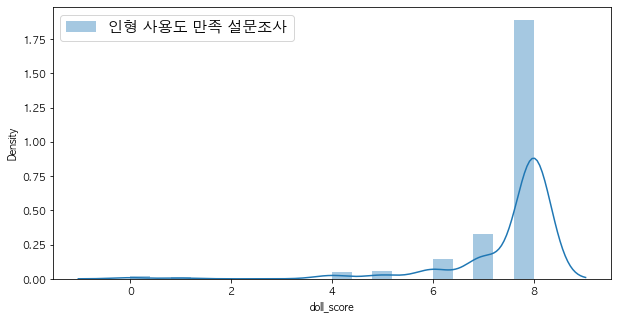

In [63]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.distplot(df["doll_score"], label = "인형 사용도 만족 설문조사")
plt.legend(fontsize = 15)

In [64]:
df = df.drop(columns = col_doll)

# 우울증 설문지, 생활관리 (예 아니오)  => 점수로 전처리 후 점수/카테고리만 남기기
## 점수가 높은게 안 좋은 항목들임

In [65]:
def convert_1(x): # 일반문항
    if x=="예": return 1
    elif x=="아니오": return 0

def convert_2(x): # reverse 문항
    if x=="예": return 0
    elif x=="아니오": return 1

In [66]:
for i in col_psy_before: 
    if ("sgd1" in i)|("sgd5" in i)|("sgd7" in i)|("sgd11" in i)|("sgd13" in i):
        df[i]= df[i].apply(convert_2)
    else: df[i]= df[i].apply(convert_1)

for i in col_psy_after: 
    if ("sgd1" in i)|("sgd5" in i)|("sgd7" in i)|("sgd11" in i)|("sgd13" in i):
        df[i]= df[i].apply(convert_2)
    else: df[i]= df[i].apply(convert_1)

for i in col_life1_before: 
    df[i]= df[i].apply(convert_1)

for i in col_life1_after: 
    df[i]= df[i].apply(convert_1)

In [67]:
df["psy_before"]= df['sgd1_P']
for i in col_psy_before:
    if i == 'sgd1_P': continue
    else: df["psy_before"] += df[i]
    
df["psy_after"]= df['P_sgd1_P']
for i in col_psy_after: 
    if i == 'P_sgd1_P': continue
    else: df["psy_after"] += df[i]

In [68]:
df["life1_before"]= df['A1']
for i in col_life1_before: 
    if i == 'A1': continue
    else: df["life1_before"] += df[i]
    
df["life1_after"]= df['p_a1']
for i in col_life1_after: 
    if i == 'A1': continue
    else: df["life1_after"] += df[i]

In [69]:
df["psy_before_cat"]=np.nan
df["psy_after_cat"]=np.nan

df.loc[df.psy_before>=11, "psy_before_cat"] = "고위험군"
df.loc[df.psy_before<11, "psy_before_cat"] = "위험낮음"

df.loc[df.psy_after>=11, "psy_after_cat"] = "고위험군"
df.loc[df.psy_after<11, "psy_after_cat"] = "위험낮음"

# 시니어 생활관리: 3, 2, 1 척도. => 점수로 전처리 후 점수/카테고리만 남기기
## 점수가 높은게 좋은 항목

In [70]:
for i in col_life2_before: 
    df[i] = df[i].replace("매일 규칙적", 3)
    df[i] = df[i].replace("매일 정확한 시간에 약을 복용하고 있음", 3)
    df[i] = df[i].replace("매일 규칙적 세끼 식사하고 있음", 3)
    df[i] = df[i].replace("매일 긍정적", 3)
    df[i] = df[i].replace("매우 긍정적", 3)
    df[i] = df[i].replace("매일 다른 사람들과 접촉하고 싶음", 3)
    
    df[i] = df[i].replace("때에 따라", 2)
    df[i] = df[i].replace("가끔 필요시", 2)
    df[i] = df[i].replace("조금 있음", 2)
    df[i] = df[i].replace("가끔 약 먹는 것을 잊을 때가 있음", 2)
    df[i] = df[i].replace("가끔 약 먹는 것을 잊어 먹을 때가 있음", 2)
    df[i] = df[i].replace("가끔 식사시간 놓침", 2)
    df[i] = df[i].replace("가끔 부정적인 생각이 들 때가 있음", 2)
    df[i] = df[i].replace("가끔 다른 사람들과 접촉하고 싶음", 2)
    
    df[i] = df[i].replace("일정 하지 않음", 1)
    df[i] = df[i].replace("거의 하지 않음", 1)
    df[i] = df[i].replace("거의 없음", 1)
    df[i] = df[i].replace("거의 매번 약 먹는 것을 잊음", 1)
    df[i] = df[i].replace("거의 매번 약 먹는 것을 잊어 먹음", 1)
    df[i] = df[i].replace("거의 매번 식사시간 놓침", 1)
    df[i] = df[i].replace("거의 매번 식사 시간 놓침", 1)
    df[i] = df[i].replace("긍정적인 생각을 거의 하지 않음", 1)
    df[i] = df[i].replace("다른 사람들과 접촉하고 싶지 않음", 1)

In [71]:
for i in col_life2_after: 
    df[i] = df[i].replace("매일 규칙적", 3)
    df[i] = df[i].replace("매일 정확한 시간에 약을 복용하고 있음", 3)
    df[i] = df[i].replace("매일 규칙적 세끼 식사하고 있음", 3)
    df[i] = df[i].replace("매일 긍정적", 3)
    df[i] = df[i].replace("매우 긍정적", 3)
    df[i] = df[i].replace("매일 다른 사람들과 접촉하고 싶음", 3)
    
    df[i] = df[i].replace("때에 따라", 2)
    df[i] = df[i].replace("가끔 필요시", 2)
    df[i] = df[i].replace("조금 있음", 2)
    df[i] = df[i].replace("가끔 약 먹는 것을 잊을 때가 있음", 2)
    df[i] = df[i].replace("가끔 약 먹는 것을 잊어 먹을 때가 있음", 2)
    df[i] = df[i].replace("가끔 식사시간 놓침", 2)
    df[i] = df[i].replace("가끔 부정적인 생각이 들 때가 있음", 2)
    df[i] = df[i].replace("가끔 다른 사람들과 접촉하고 싶음", 2)
    
    df[i] = df[i].replace("일정 하지 않음", 1)
    df[i] = df[i].replace("거의 하지 않음", 1)
    df[i] = df[i].replace("거의 없음", 1)
    df[i] = df[i].replace("거의 매번 약 먹는 것을 잊음", 1)
    df[i] = df[i].replace("거의 매번 약 먹는 것을 잊어 먹음", 1)
    df[i] = df[i].replace("거의 매번 식사시간 놓침", 1)
    df[i] = df[i].replace("거의 매번 식사 시간 놓침", 1)
    df[i] = df[i].replace("긍정적인 생각을 거의 하지 않음", 1)
    df[i] = df[i].replace("다른 사람들과 접촉하고 싶지 않음", 1)

In [72]:
df[col_life2_before+col_life2_after].dtypes

1
D1      float64
D2      float64
D3      float64
D4      float64
D5      float64
D6      float64
D7      float64
D8      float64
p_d1    float64
p_d2    float64
p_d3    float64
p_d4    float64
p_d5    float64
p_d6    float64
P_D7    float64
P_D8     object
dtype: object

In [73]:
df["P_D8"] = df["P_D8"].astype("float")

In [74]:
col_life2_after

['p_d1', 'p_d2', 'p_d3', 'p_d4', 'p_d5', 'p_d6', 'P_D7', 'P_D8']

In [75]:
df["slife_before"]= df['D1']
for i in col_life2_before: 
    if i == 'D1': continue
    else: df["slife_before"] += df[i]
    
df["slife_after"]= df['p_d1']
for i in col_life2_after: 
    if i == 'p_d1': continue
    else: df["slife_after"] += df[i]

In [76]:
df["slife_before_cat"]=np.nan
df["slife_after_cat"]=np.nan

df.loc[df.slife_before>=18, "slife_before_cat"] = "좋음"
df.loc[(df.slife_before>=11)&(df.slife_before<18), "slife_before_cat"] = "보통"
df.loc[df.slife_before<11, "slife_before_cat"] = "나쁨"

df.loc[df.slife_after>=18, "slife_after_cat"] = "좋음"
df.loc[(df.slife_after>=11)&(df.slife_after<18), "slife_after_cat"] = "보통"
df.loc[df.slife_after<11, "slife_after_cat"] = "나쁨"

Text(0.5, 1.0, '우울증 척도 사전 사후 분포')

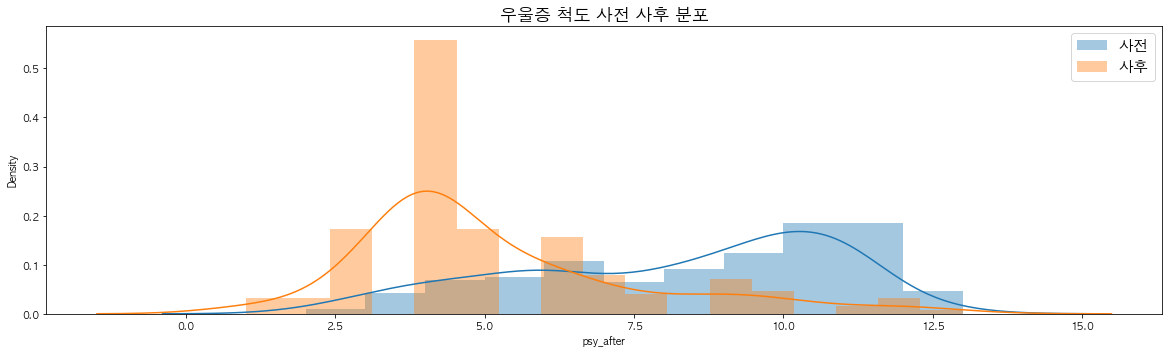

In [77]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
sns.distplot(df["psy_before"], label = "사전")
sns.distplot(df["psy_after"], label="사후")
plt.legend(fontsize = 15)
plt.title("우울증 척도 사전 사후 분포", fontsize = 17)

Text(0.5, 1.0, '우울증 사후 분포')

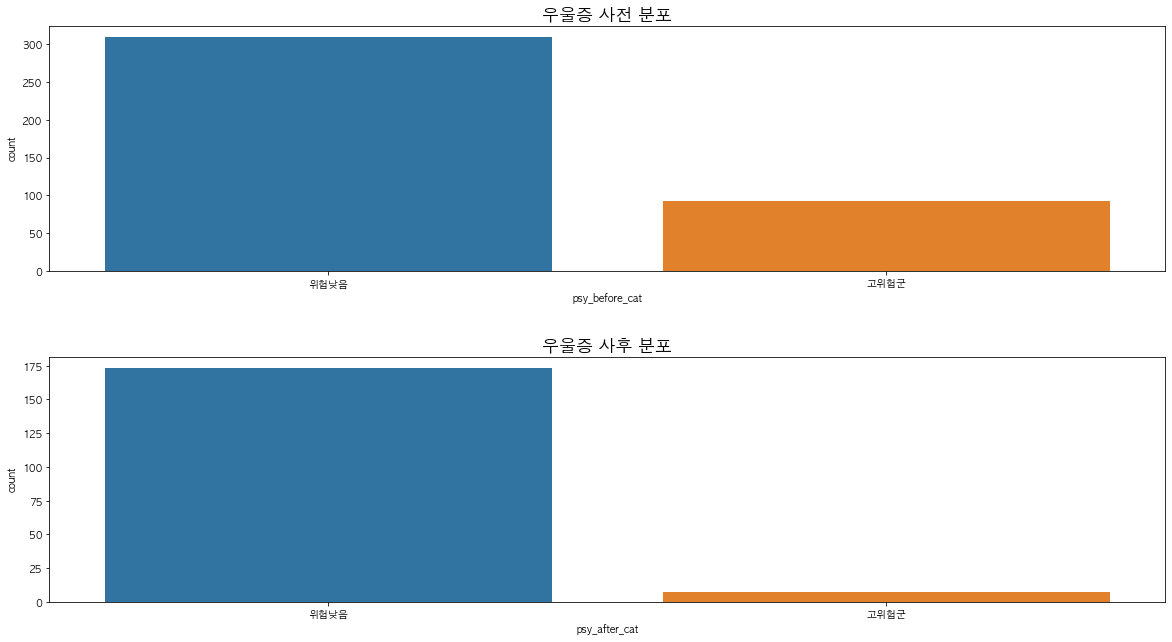

In [78]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
sns.countplot(df["psy_before_cat"], ax=ax[0])
ax[0].set_title("우울증 사전 분포", fontsize = 17)
sns.countplot(df["psy_after_cat"],  ax=ax[1])
ax[1].set_title("우울증 사후 분포", fontsize = 17)

Text(0.5, 1.0, '시니어 생활관리 사전 사후 분포')

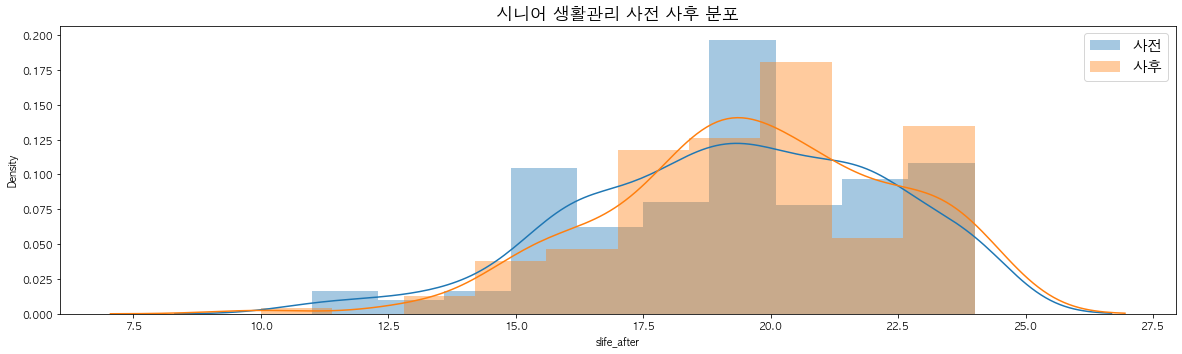

In [79]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
sns.distplot(df["slife_before"], label = "사전")
sns.distplot(df["slife_after"], label="사후")
plt.legend(fontsize = 15)
plt.title("시니어 생활관리 사전 사후 분포", fontsize = 17)

Text(0.5, 1.0, '시니어 생활관리 사후 분포')

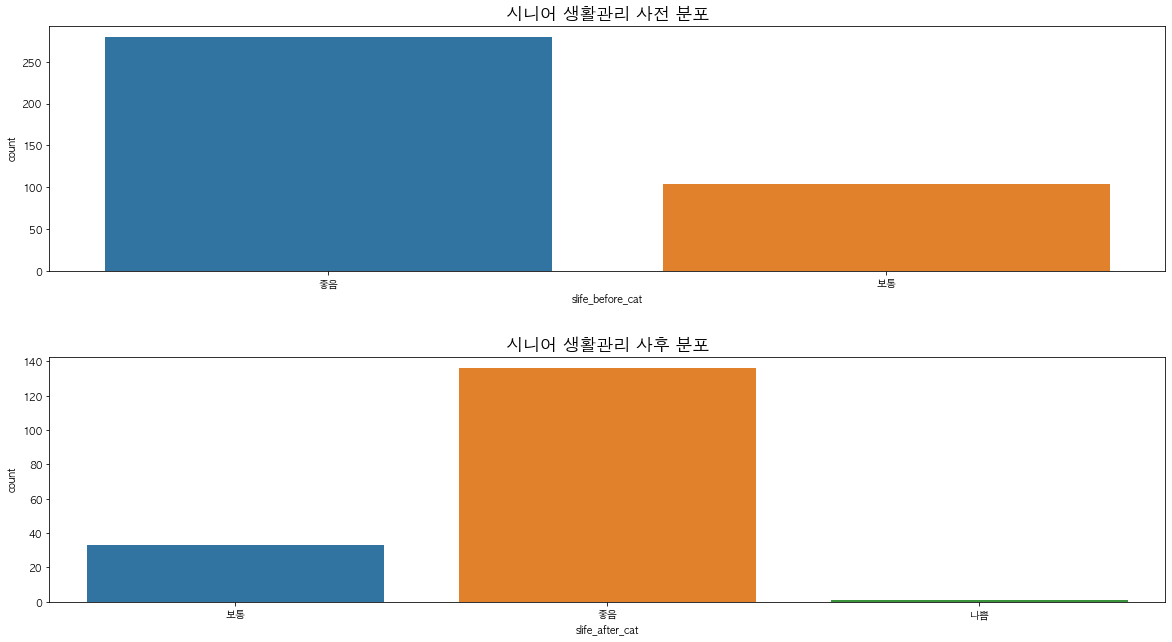

In [80]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
sns.countplot(df["slife_before_cat"], ax=ax[0])
ax[0].set_title("시니어 생활관리 사전 분포", fontsize = 17)
sns.countplot(df["slife_after_cat"],  ax=ax[1])
ax[1].set_title("시니어 생활관리 사후 분포", fontsize = 17)

Text(0.5, 1.0, '생활1 사전 사후 분포')

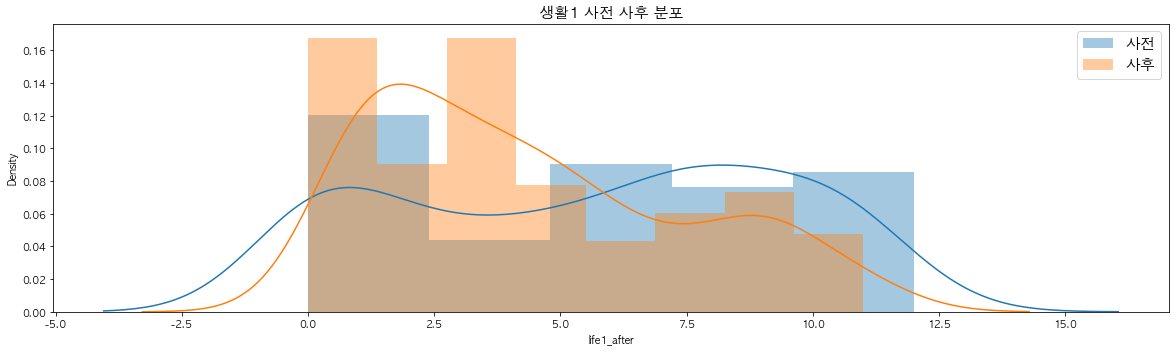

In [81]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
sns.distplot(df["life1_before"], label = "사전")
sns.distplot(df["life1_after"], label="사후")
plt.legend(fontsize = 15)
plt.title("생활1 사전 사후 분포", fontsize = 15)

In [82]:
df = df.drop(columns = col_psy_before)
df = df.drop(columns = col_psy_after)
df = df.drop(columns = col_life1_before)
df = df.drop(columns = col_life1_after)
df = df.drop(columns = col_life2_before)
df = df.drop(columns = col_life2_after)

# 복용약 col_med, 복용 시간 col_med_t
## => 복용 시간은 column 명 변경 후 더미화

In [83]:
df[col_med+col_med_t].head()

1,dq8_1,dq8_2,dq8_3,dq8_4,dq8_5,dq8_6,dq8_7,dq7_1,dq7_2,dq7_3,dq7_4,dq7_5,dq7_6,dq7_7
0,치매,우울증,천식약,NaN,NaN,NaN,NaN,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN
1,뇌졸증/뇌경색,우울증,구체적인 약명,NaN,NaN,NaN,NaN,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN
2,혈압,당뇨,심장약,방광약/콩팥/신장약,고지혈증,NaN,NaN,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN
3,디스크,NaN,NaN,NaN,NaN,NaN,NaN,아침 식전,NaN,NaN,NaN,NaN,NaN,NaN
4,혈압,NaN,NaN,NaN,NaN,NaN,NaN,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN


In [84]:
for i in col_med_t:
    a_ = df_info[df_info.col==i]["info"].values[0]
    print("{}_{} :".format(a_, i), df[i].unique())

복용시간_dq7_1 : [nan '아침 식전' '복용약 없음']
nan_dq7_2 : ['아침 식후' nan]
nan_dq7_3 : [nan '점심 식전']
nan_dq7_4 : [nan '점심 식후']
nan_dq7_5 : [nan '저녁 식전']
nan_dq7_6 : [nan '저녁 식후']
nan_dq7_7 : [nan '취침 전']


In [85]:
b_id = df[df["dq7_1"]=="복용약 없음"].index

In [86]:
print(len(df[df["dq7_1"].isna()]))
for i in range(2, 8):
    co = "dq7_{}".format(i)
    print(len(df[df[co].isna()]))

362
140
450
392
445
234
426


In [87]:
for i in col_med_t: 
    df.loc[df[i].notnull(), i]= 1

df.loc[b_id, "dq7_1"] = 0

for i in col_med_t:
    df[i]= df[i].fillna(0)

In [88]:
df = df.rename(columns = {"dq7_1": "아침식전_복용", 
                          "dq7_2": "아침식후_복용",
                          "dq7_3": "점심식전_복용", 
                          "dq7_4": "점심식후_복용",
                          "dq7_5": "저녁식전_복용", 
                          "dq7_6": "저녁식후_복용",
                          "dq7_7": "취침전_복용"})

## 복용약: 많이 복용하는 약만 column 만들어주기

In [89]:
col_med

['dq8_1', 'dq8_2', 'dq8_3', 'dq8_4', 'dq8_5', 'dq8_6', 'dq8_7']

In [90]:
for i in col_med: 
    print(i, len(df[df[i].isnull()]))

dq8_1 53
dq8_2 170
dq8_3 306
dq8_4 393
dq8_5 439
dq8_6 453
dq8_7 458


In [91]:
print(len(df[(df.dq8_1.isnull())|(df.dq8_2.isnull())]))
print(len(df[(df.dq8_2.isnull())|(df.dq8_3.isnull())]))
print(len(df[(df.dq8_3.isnull())|(df.dq8_4.isnull())]))
print(len(df[(df.dq8_4.isnull())|(df.dq8_5.isnull())]))
print(len(df[(df.dq8_5.isnull())|(df.dq8_6.isnull())]))
print(len(df[(df.dq8_6.isnull())|(df.dq8_7.isnull())]))

170
306
393
439
453
458


In [92]:
b_id2 = df[df["dq8_1"].isnull()].index

In [93]:
for i in col_med:
    df[i]= df[i].fillna(100)

In [94]:
med_list = []
for i in col_med:
    med_list.extend(df[i].values)
print(set(med_list))

{'우울증', '비뇨기과/소변약', '내과약', 4.0, '(뇌)혈관약', '관절약', '황반변성', '전립선약', '갑상선약', '류마티스', '잇몸약', '신경과수면제', 23.0, '신부전증', '진통제', '혈소판', '췌장약', '심혈관', 39.0, '당뇨', '콜레스테롤', 44.0, 49.0, '치매', '혈전증', '디스크', '영양제', '천식약', '기침/가래', '변비/관장', '심정도', '요실금', '간', '위암', '심장약', '구체적인 약명', '섬망증', '알레르기(비염)', '심근경색', '소화제/소화불량', '식도염약', '협심증', '협착증', '골다공증/칼슘', '피부약', '항응고제', 90.0, 91.0, '통풍', '뇌졸증/뇌경색', '뇌출혈약', '복용약 없음', 100, '질병 무응답', '골절', '빈혈', '방광약/콩팥/신장약', '위(장)약', '두피약', '혈압', '눈약', '폐', '허리진통제', '공황장애약', '고지혈증', '어지럼증약', '신경안정제', '혈액순환', '파킨슨'}


In [95]:
len(set(med_list))

69

In [96]:
from collections import Counter
Counter(med_list) # 7개 약 컬럼 합계임~!

Counter({'치매': 89,
         '뇌졸증/뇌경색': 55,
         '혈압': 145,
         '디스크': 16,
         100: 2272,
         '우울증': 146,
         '눈약': 10,
         '고지혈증': 50,
         '복용약 없음': 7,
         '콜레스테롤': 7,
         '혈액순환': 8,
         '질병 무응답': 10,
         '심장약': 25,
         '당뇨': 64,
         '위(장)약': 23,
         '변비/관장': 10,
         '신경과수면제': 47,
         '간': 8,
         91.0: 22,
         '영양제': 8,
         '관절약': 27,
         '전립선약': 16,
         '폐': 6,
         '소화제/소화불량': 5,
         '허리진통제': 3,
         '진통제': 6,
         '피부약': 8,
         44.0: 4,
         '류마티스': 2,
         '갑상선약': 11,
         '신경안정제': 7,
         '구체적인 약명': 4,
         '방광약/콩팥/신장약': 9,
         '심근경색': 2,
         '천식약': 20,
         '협착증': 1,
         '파킨슨': 4,
         '신부전증': 1,
         '골다공증/칼슘': 7,
         '골절': 2,
         '(뇌)혈관약': 3,
         '식도염약': 2,
         39.0: 1,
         '혈전증': 3,
         '황반변성': 1,
         49.0: 1,
         '빈혈': 1,
         '혈소판': 1,
         '알레르기(비염)': 2,
  

## 일단 7개 컬럼 합쳐서 count 40개 이상인 애들만 column으로 남기겠습니다!

In [97]:
c_med = pd.DataFrame(Counter(med_list).keys())
c_med["val"] =Counter(med_list).values()
c_med.columns = ["약명", "val"]

In [98]:
c_med[c_med.val>40]

,약명,val
0,치매,89
1,뇌졸증/뇌경색,55
2,혈압,145
4,100,2272
5,우울증,146
7,고지혈증,50
13,당뇨,64
16,신경과수면제,47


In [99]:
c_med_list = ['치매', '뇌졸증/뇌경색', '혈압', '우울증', '고지혈증', '당뇨', '신경과수면제']

In [100]:
for cc in c_med_list: 
    df["{}_약".format(cc)]= 0
    df.loc[b_id2,  "{}_약".format(cc)] = np.nan
    for i in col_med: 
        df.loc[df[i]==cc, "{}_약".format(cc)]=1

In [101]:
df = df.rename(columns = {"뇌졸증/뇌경색_약": "뇌졸증_약"})

## 인당 복용약 개수도 column 만들겠음

In [102]:
df["med_count"]=0

def convert_med(x):
    if x== 100 : return 0
    elif x== 4.0 : return 0
    elif x== 23.0 : return 0
    elif x== 39.0 : return 0
    elif x== 44.0 : return 0
    elif x== 49.0 : return 0
    elif x== 90.0 : return 0
    elif x== 91.0 : return 0
    else: return 1

for i in col_med:
    df["med_count"]+=df[i].apply(convert_med)

df.loc[b_id2,  "med_count"] = np.nan

In [103]:
df= df.drop(columns = col_med)

# NA check

In [104]:
df.columns

Index(['doll_id', '기관', '기관2', 'SERIAL', 'born', 'age', 'sex', '수급여부', '세대구성',
       '제공서비스', '치매', '우울증', '만성복약', '고립', '거동불편', '소리반응', '인형관심', '종교유무',
       '모니터링', '건강관심', '주택타입', '배우자', '자녀', '자녀수', '아들수', '딸수', '청결', '식사',
       '공공방문', '종교', '기상', '아침', '점심', '저녁', '취침', '아침식전_복용', '아침식후_복용',
       '점심식전_복용', '점심식후_복용', '저녁식전_복용', '저녁식후_복용', '취침전_복용', '왕래여부',
       'doll_score', 'psy_before', 'psy_after', 'life1_before', 'life1_after',
       'psy_before_cat', 'psy_after_cat', 'slife_before', 'slife_after',
       'slife_before_cat', 'slife_after_cat', '치매_약', '뇌졸증_약', '혈압_약', '우울증_약',
       '고지혈증_약', '당뇨_약', '신경과수면제_약', 'med_count'],
      dtype='object', name=1)

In [105]:
check_NA(df)

NA check
기관2 279 -> 60.784 %
SERIAL 205 -> 44.662 %
수급여부 279 -> 60.784 %
세대구성 279 -> 60.784 %
제공서비스 286 -> 62.309 %
치매 279 -> 60.784 %
우울증 279 -> 60.784 %
만성복약 279 -> 60.784 %
고립 279 -> 60.784 %
거동불편 279 -> 60.784 %
소리반응 279 -> 60.784 %
인형관심 279 -> 60.784 %
종교유무 279 -> 60.784 %
모니터링 279 -> 60.784 %
건강관심 279 -> 60.784 %
주택타입 26 -> 5.664 %
배우자 279 -> 60.784 %
자녀 279 -> 60.784 %
자녀수 282 -> 61.438 %
아들수 380 -> 82.789 %
딸수 383 -> 83.442 %
청결 285 -> 62.092 %
식사 285 -> 62.092 %
공공방문 285 -> 62.092 %
종교 180 -> 39.216 %
기상 180 -> 39.216 %
아침 180 -> 39.216 %
점심 180 -> 39.216 %
저녁 180 -> 39.216 %
취침 180 -> 39.216 %
doll_score 25 -> 5.447 %
psy_before 57 -> 12.418 %
psy_after 279 -> 60.784 %
life1_before 279 -> 60.784 %
life1_after 290 -> 63.181 %
psy_before_cat 57 -> 12.418 %
psy_after_cat 279 -> 60.784 %
slife_before 76 -> 16.558 %
slife_after 289 -> 62.963 %
slife_before_cat 76 -> 16.558 %
slife_after_cat 289 -> 62.963 %
치매_약 53 -> 11.547 %
뇌졸증_약 53 -> 11.547 %
혈압_약 53 -> 11.547 %
우울증_약 53 -> 11

# column type check

In [106]:
df.dtypes

1
doll_id              object
기관                   object
기관2                  object
SERIAL               object
born                  int64
age                   int64
sex                  object
수급여부                 object
세대구성                 object
제공서비스                object
치매                  float64
우울증                 float64
만성복약                float64
고립                  float64
거동불편                float64
소리반응                float64
인형관심                float64
종교유무                float64
모니터링                float64
건강관심                float64
주택타입                 object
배우자                 float64
자녀                  float64
자녀수                 float64
아들수                 float64
딸수                  float64
청결                   object
식사                   object
공공방문                float64
종교                   object
기상                  float64
아침                  float64
점심                  float64
저녁                  float64
취침                  float64
아침식전_복용           

In [107]:
df["doll_id"] = df.doll_id.astype("int")

# column 별 분포 확인

In [108]:
col_info2 = ['기관', '기관2', 'born', 'age', 'sex', '수급여부', '세대구성',
       '제공서비스', '치매', '우울증', '만성복약', '고립', '거동불편', '소리반응', '인형관심', '종교유무',
       '모니터링', '건강관심', '주택타입', '배우자', '자녀', '자녀수', '아들수', '딸수', '청결', '식사',
       '공공방문', '종교', '기상', '아침', '점심', '저녁', '취침', '아침식전_복용', '아침식후_복용',
       '점심식전_복용', '점심식후_복용', '저녁식전_복용', '저녁식후_복용', '취침전_복용', '왕래여부',
       'doll_score', 'psy_before', 'psy_after', 'life1_before', 'life1_after',
       'psy_before_cat', 'psy_after_cat', 'slife_before', 'slife_after',
       'slife_before_cat', 'slife_after_cat', '치매_약', '뇌졸증_약', '혈압_약', '우울증_약',
       '고지혈증_약', '당뇨_약', '신경과수면제_약', 'med_count']

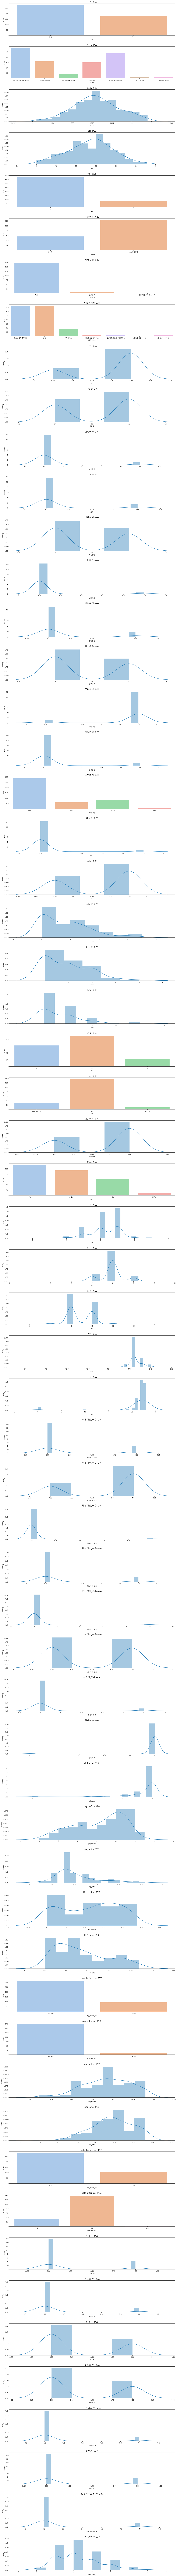

In [109]:
n = len(col_info2)
fig,ax = plt.subplots(n,1,figsize=(20,5*n))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
for ind, i in enumerate(col_info2): 
    if (df[i].dtypes=="int64")|(df[i].dtypes=="int32")|(df[i].dtypes=="float"): 
        sns.distplot(df[i], ax= ax[ind])
        ax[ind].set_title("{} 분포".format(i), fontsize = 15)
    else: 
        sns.countplot(df[i], palette = "pastel", ax=ax[ind])
        ax[ind].set_title("{} 분포".format(i), fontsize = 15)

In [110]:
df.to_excel("data/survey_processed.xlsx", index=False)